In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import re

# import math.exp as exp
# 忽略除以0的报错
np.seterr(divide='ignore', invalid='ignore')

# 拟合数据集
tr = pd.read_csv("train去0.csv")
te = pd.read_csv("test.csv")
x = tr["grp"]
# tr['reach'] = tr['reach'].str.strip('%').astype(float)/100  
y = tr['reach']
#Y=[]
#for i in tr.iloc[:,5]:
#    Y.append(float(i[0:4])*0.01)

In [37]:
np.log(2)

0.6931471805599453

In [38]:
from scipy import optimize as op

In [39]:
from scipy.optimize import curve_fit

## 1.一般多项式型

In [103]:
#一般型
# 普通一阶函数方程(直线)
def ordinary1(x, a, b):
    return a*x + b

# 二阶曲线方程
def ordinary2(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

# 三阶曲线方程
def ordinary3(x, a, b, c, d):
    return a * np.power(x, 3) + b * np.power(x, 2) + c * x + d

# 四阶曲线方程
def ordinary4(x, a, b, c, d, e):
    return  a * np.power(x, 4) + b * np.power(x, 3) + c * np.power(x, 2) + d * x + e


In [104]:
# 拟合参数都放在popt里，popt是个数组，参数顺序即你自定义函数中传入的参数的顺序
popt1, pcov1 = curve_fit(func_1, x, y)
a1 = popt1[0]
b1 = popt1[1]
popt2, pcov2 = curve_fit(func_2, x, y)
a2 = popt2[0]
b2 = popt2[1]
c2 = popt2[2]
popt3, pcov3 = curve_fit(func_3, x, y)
a3 = popt3[0]
b3 = popt3[1]
c3 = popt3[2]
d3 = popt3[3]
popt4, pcov4 = curve_fit(func_4, x, y)
a4 = popt4[0]
b4 = popt4[1]
c4 = popt4[2]
d4 = popt4[3]
e4 = popt4[4]


## 2.生长曲线型

In [102]:
# 一阶生长曲线型
def Logistic1(x, a, b):
    return a * np.exp( b * x )

# 二阶生长曲线型
def Logistic2(x, a, b, c):
    return a * np.exp( b * np.power(x, 2) + c * x )

# 三阶生长曲线型
def Logistic3(x, a, b, c, d):
    return a * np.exp( b * np.power(x, 3) + c * np.power(x, 2) + d * x )

# 四阶生长曲线型
def Logistic4(x, a, b, c, d, e):
    return a * np.exp( b * np.power(x, 4) + c * np.power(x, 3) + d * np.power(x, 2) + e * x )

In [43]:
# 拟合参数都放在popt里，popt是个数组，参数顺序即你自定义函数中传入的参数的顺序
popt5, pcov5 = curve_fit(Logistic1, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
a5 = popt5[0]
b5 = popt5[1]
popt6, pcov6 = curve_fit(Logistic2, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
a6 = popt6[0]
b6 = popt6[1]
c6 = popt6[2]

#大于二阶的时候，参数方程出现零值，表明func(params ) 与要拟合的 Y 值相差甚远。这也能从logistics二阶中看出啦
# popt7, pcov7 = curve_fit(Logistic3, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
# a7 = popt7[0]
# b7 = popt7[1]
# c7 = popt7[2]
# d7 = popt7[3]
# popt8, pcov8 = curve_fit(Logistic4, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
# a8 = popt8[0]
# b8 = popt8[1]
# c8 = popt8[2]
# d8 = popt8[3]
# e8 = popt8[4]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


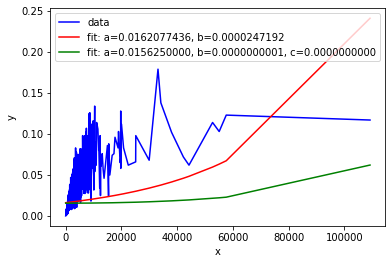

In [44]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'b-', label='data')
plt.plot(x, Logistic1(x, *popt5), 'r-',
         label='fit: a=%5.10f, b=%5.10f' % tuple(popt5))
plt.plot(x, Logistic2(x, *popt6), 'g-',
         label='fit: a=%5.10f, b=%5.10f, c=%5.10f' % tuple(popt6))


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 3.幂函数与对数综合型

In [120]:
# 幂函数与对数综合型
def log1(x, a, b):
    return a * np.exp(b * np.log(x))
def log2(x, a, b, c):
    return a * np.exp(b * np.log(x) + c * np.power(np.log(x), 2))
def log3(x, a, b, c, d):
    return a * np.exp(b * np.log(x) + c * np.power(np.log(x), 2) + d * np.power(np.log(x), 3))
def log4(x, a, b, c, d, e):
    return a * np.exp(b * np.log(x) + c * np.power(np.log(x), 2) + d * np.power(np.log(x), 3) + e * np.power(np.log(x), 4))

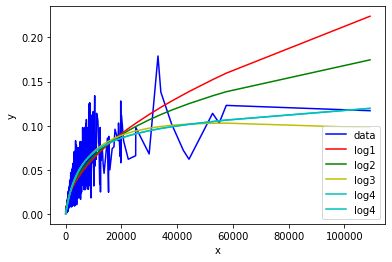

In [121]:
popt7, pcov7 = curve_fit(log1, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
a7 = popt7[0]
b7 = popt7[1]

popt8, pcov8 = curve_fit(log2, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
a8 = popt8[0]
b8 = popt8[1]
c8 = popt8[2]

popt9, pcov9 = curve_fit(log3, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
a9 = popt9[0]
b9 = popt9[1]
c9 = popt9[2]
d9 = popt9[3]

popt10, pcov10 = curve_fit(log4, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
a10 = popt10[0]
b10 = popt10[1]
c10 = popt10[2]
d10 = popt10[3]
e10 = popt10[4]


plt.plot(x, y, 'b-', label='data')
plt.plot(x, log1(x, *popt7), 'r-',
         label='log1' )
plt.plot(x, log2(x, *popt8), 'g-',
         label='log2')
plt.plot(x, log3(x, *popt9), 'y-',
         label='log3')
plt.plot(x, log4(x, *popt10), 'c-',
         label='log4')
plt.plot(x, log4(x, *popt10), 'c-',
         label='log4')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [47]:
popt9

array([ 1.40820164e-05,  1.00000000e+00,  3.92497663e-02, -5.14833469e-03])

## 4.指数与幂函数综合型

In [132]:
def index_power1(x, a, b):
    return a * np.log(x) + b
def index_power2(x, a, b, c):
    return a * np.power(np.log(x), 2) + b * np.log(x) + c
def index_power3(x, a, b, c, d):
    return a * np.power(np.log(x), 3) + b * np.power(np.log(x), 2) + c * np.log(x) + d
def index_power4(x, a, b, c, d, e):
    return a * np.power(np.log(x), 4) + b * np.power(np.log(x), 3) + c * np.power(np.log(x), 2) + d * np.log(x) + e
def index_power5(x, a, b, c, d, e, f):
    return a * np.power(np.log(x), 5) + b * np.power(np.log(x), 4) + c * np.power(np.log(x), 3) + d * np.power(np.log(x), 2) + e * np.log(x) + f
def index_power6(x, a, b, c, d, e, f, g):
    return g * np.power(np.log(x), 6) + a * np.power(np.log(x), 5) + a * np.power(np.log(x), 5) + b * np.power(np.log(x), 4) + c * np.power(np.log(x), 3) + d * np.power(np.log(x), 2) + e * np.log(x) + f


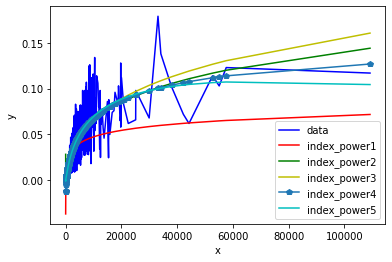

In [243]:
popt11, pcov11 = curve_fit(index_power1, x, y, maxfev=1000, bounds = [-5,1], check_finite=False, method = "trf")
a11 = popt11[0]
b11 = popt11[1]

popt12, pcov12 = curve_fit(index_power2, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
a12 = popt12[0]
b12 = popt12[1]
c12 = popt12[2]

popt13, pcov13 = curve_fit(index_power3, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
a13 = popt13[0]
b13 = popt13[1]
c13 = popt13[2]
d13 = popt13[3]

popt14, pcov14 = curve_fit(index_power4, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
a14 = popt14[0]
b14 = popt14[1]
c14 = popt14[2]
d14 = popt14[3]
e14 = popt14[4]

popt15, pcov15 = curve_fit(index_power5, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")
a14 = popt14[0]
b14 = popt14[1]
c14 = popt14[2]
d14 = popt14[3]
e14 = popt14[4]
f15 = popt15[5]

# popt16, pcov16 = curve_fit(index_power5, x, y, maxfev=1000, bounds = [-np.inf,1], check_finite=False, method = "trf")


plt.plot(x, y, 'b-', label='data')
plt.plot(x, index_power1(x, *popt11), 'r-',
         label='index_power1' )
plt.plot(x, index_power2(x, *popt12), 'g-',
         label='index_power2')
plt.plot(x, index_power3(x, *popt13), 'y-',
         label='index_power3')
plt.plot(x, index_power4(x, *popt14), 'p-',
         label='index_power4')
plt.plot(x, index_power5(x, *popt15), 'c-',
         label='index_power5')
# plt.plot(x, index_power6(x, *popt16), 'k-',
#          label='index_power6')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 5.S型

In [216]:
def s1(x, a):
    return 1/(a * np.exp(-x) )
def s2(x, a, b,):
    return 1/(a * np.power(np.exp(-x), 2) + b * np.exp(-x) )
def s3(x, a, b, c):
    return  1/(a * np.power(np.exp(-x), 3) + b * np.power(np.exp(-x), 2) + c * np.exp(-x))
def s4(x, a, b, c, d):
    return 1/(a * np.power(np.exp(-x), 4) + b * np.power(np.exp(-x), 3) + c * np.power(np.exp(-x), 2) + d * np.exp(-x) )
def s5(x, a, b, c, d, e):
    return 1/(a * np.power(np.exp(-x), 5) + b * np.power(np.exp(-x), 4) + c * np.power(np.exp(-x), 3) + d * np.power(np.exp(-x),2) + e * np.exp(-x) )
def s6(x, a, b, c, d, e, f):
    return 1/(a * np.power(np.exp(-x), 5) + b * np.power(np.exp(-x), 5) + c * np.power(np.exp(-x), 4) + d * np.power(np.exp(-x), 3) + e * np.power(np.exp(-x),2) + f * np.exp(-x) )
def s7(x, a, b, c, d, e, f, g):
    return 1/(a * np.power(np.exp(-x), 6) + b * np.power(np.exp(-x), 5) + c * np.power(np.exp(-x), 5) + d * np.power(np.exp(-x), 4) + e * np.power(np.exp(-x), 3) + f * np.power(np.exp(-x),2) + g * np.exp(-x) )
 

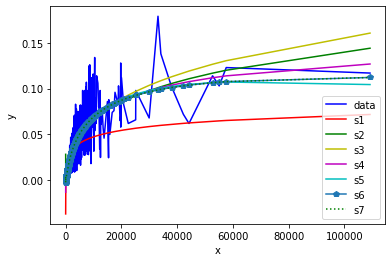

In [151]:
popt16, pcov16 = curve_fit(index_power1, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")
a16 = popt16[0]
b16 = popt16[1]

popt17, pcov17 = curve_fit(index_power2, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")
a17 = popt17[0]
b17 = popt17[1]
c17 = popt17[2]

popt18, pcov18 = curve_fit(index_power3, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")
a18 = popt18[0]
b18 = popt18[1]
c18 = popt18[2]
d18 = popt18[3]

popt19, pcov19 = curve_fit(index_power4, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")
a19 = popt19[0]
b19 = popt19[1]
c19 = popt19[2]
d19 = popt19[3]
d19 = popt19[4]

popt20, pcov20 = curve_fit(index_power5, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")

popt21, pcov21 = curve_fit(index_power6, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")



plt.plot(x, y, 'b-', label='data')
plt.plot(x, index_power1(x, *popt16), 'r-',
         label='s1' )
plt.plot(x, index_power2(x, *popt17), 'g-',
         label='s2')
plt.plot(x, index_power3(x, *popt18), 'y-',
         label='s3')
plt.plot(x, index_power4(x, *popt19), 'm-',
         label='s4')
plt.plot(x, index_power5(x, *popt20), 'c-',
         label='s5')
plt.plot(x, index_power6(x, *popt21), 'p-',
         label='s6')
plt.plot(x, index_power6(x, *popt21), color='green', linestyle=':',
         label='s7')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### 6.倒x指数型

In [194]:
def rex1(x, a, b):
    return np.exp(a * 1/x) + b
def rex2(x, a, b, c):
    return np.exp(a * np.power(1/x, 2) + b * 1/x) + c
def rex3(x, a, b, c, d):
    return np.exp(a * np.power(1/x, 3) + b * np.power(1/x, 2) + c * 1/x ) + d
def rex4(x, a, b, c, d, e):
    return np.exp(a * np.power(1/x, 4) + b * np.power(1/x, 3) + c * np.power(1/x, 2) + d * 1/x) + e
def rex5(x, a, b, c, d, e, f):
    return np.exp(a * np.power(1/x, 5) + b * np.power(1/x, 4) + c * np.power(1/x, 3) + d * np.power(1/x, 2) + e * 1/x ) + f
def rex6(x, a, b, c, d, e, f, g):
    return np.exp(a * np.power(1/x, 6) + b * np.power(1/x, 5) + c * np.power(1/x, 4) + d * np.power(1/x, 3) + e * np.power(1/x, 2) + f * 1/x )+ g


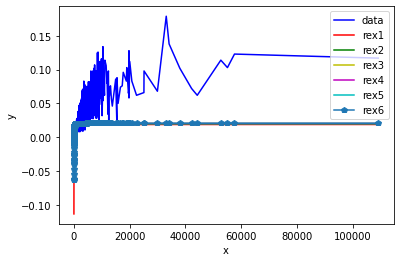

In [249]:
popt22, pcov22 = curve_fit(rex1, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")
a22 = popt22[0]
b22 = popt22[1]

popt23, pcov23 = curve_fit(rex2, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")
a23 = popt23[0]
b23 = popt23[1]
c23 = popt23[2]

popt24, pcov24 = curve_fit(rex3, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")
a24 = popt24[0]
b24 = popt24[1]
c24 = popt24[2]
d24 = popt24[3]

popt25, pcov25 = curve_fit(rex4, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")
a25 = popt25[0]
b25 = popt25[1]
c25 = popt25[2]
d25 = popt25[3]
e25 = popt25[4]

popt26, pcov26 = curve_fit(rex5, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")
a26 = popt26[0]
b26 = popt26[1]
c26 = popt26[2]
d26 = popt26[3]
e26 = popt26[4]
f26 = popt26[5]


popt27, pcov27 = curve_fit(rex6, x, y, maxfev=1000, bounds = [-1,1], check_finite=False, method = "trf")
a27 = popt27[0]
b27 = popt27[1]
c27 = popt27[2]
d27 = popt27[3]
e27 = popt27[4]
f27 = popt27[5]
g27 = popt27[6]





plt.plot(x, y, 'b-', label='data')
plt.plot(x, rex1(x, *popt22), 'r-',
         label='rex1' )
plt.plot(x, rex2(x, *popt23), 'g-',
         label='rex2')
plt.plot(x, rex3(x, *popt24), 'y-',
         label='rex3')
plt.plot(x, rex4(x, *popt25), 'm-',
         label='rex4')
plt.plot(x, rex5(x, *popt26), 'c-',
         label='rex5')
plt.plot(x, rex6(x, *popt27), 'p-',
         label='rex6')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### 7.双曲型

In [126]:
def Hyperbolic1(x, a, b):
    return 1/(a * 1/x + b )
def Hyperbolic2(x, a, b, c):
    return 1/(a * np.power(1/x, 2) + b * 1/x  + c)
def Hyperbolic3(x, a, b, c, d):
    return  1/(a * np.power(1/x, 3) + b * np.power(1/x, 2) + c * 1/x + d)
# def Hyperbolic4(x, a, b, c, d, e):
#     return 1/(a * np.power(1/x, 4) + b * np.power(1/x, 3) + c * np.power(1/x, 2) + d * 1/x + e)
# def Hyperbolic5(x, a, b, c, d, e, f):
#     return 1/(a * np.power(1/x, 5) + b * np.power(1/x, 4) + c * np.power(1/x, 3) + d * np.power(1/x,2) + e * 1/x  + f)
# def Hyperbolic6(x, a, b, c, d, e, f, g):
#     return 1/(a * np.power(1/x, 5) + b * np.power(1/x, 5) + c * np.power(1/x, 4) + d * np.power(1/x,3) + e * np.power(1/x,2) + f * 1/x  +g )
# def Hyperbolic7(x, a, b, c, d, e, f, g, h):
#     return 1/(a * np.power(1/x, 6) + b * np.power(1/x, 5) + c * np.power(1/x, 5) + d * np.power(1/x, 4) + e * np.power(1/x, 3) + f * np.power(1/x,2) + g * 1/x  + h)


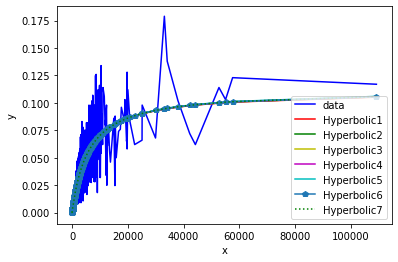

In [225]:
popt28, pcov28 = curve_fit(Hyperbolic1, x, y, maxfev=1000, check_finite=False, method = "trf")
a28 = popt28[0]
b28 = popt28[1]

popt29, pcov29 = curve_fit(Hyperbolic2, x, y, maxfev=1000, check_finite=False, method = "trf")
a29 = popt29[0]
b29 = popt29[1]
c29 = popt29[2]

popt30, pcov30 = curve_fit(Hyperbolic3, x, y, maxfev=1000, check_finite=False, method = "trf")
a30 = popt30[0]
b30 = popt30[1]
c30 = popt30[2]
d30 = popt30[3]

# popt31, pcov31 = curve_fit(Hyperbolic4, x, y, maxfev=1000, check_finite=False, method = "trf")
# a31 = popt31[0]
# b31 = popt31[1]
# c31 = popt31[2]
# d31 = popt31[3]
# d31 = popt31[4]

# popt32, pcov32 = curve_fit(Hyperbolic5, x, y, maxfev=1000, check_finite=False, method = "trf")

# popt33, pcov33 = curve_fit(Hyperbolic6, x, y, maxfev=1000, check_finite=False, method = "trf")

# popt34, pcov34 = curve_fit(Hyperbolic7, x, y, maxfev=1000, check_finite=False, method = "trf")




plt.plot(x, y, 'b-', label='data')
plt.plot(x, Hyperbolic1(x, *popt28), 'r-',
         label='Hyperbolic1' )
plt.plot(x, Hyperbolic2(x, *popt29), 'g-',
         label='Hyperbolic2')
plt.plot(x, Hyperbolic3(x, *popt30), 'y-',
         label='Hyperbolic3')
plt.plot(x, Hyperbolic4(x, *popt31), 'm-',
         label='Hyperbolic4')
plt.plot(x, Hyperbolic5(x, *popt32), 'c-',
         label='Hyperbolic5')
plt.plot(x, Hyperbolic6(x, *popt33), 'p-',
         label='Hyperbolic6')
plt.plot(x, Hyperbolic6(x, *popt33), color='green', linestyle=':',
         label='Hyperbolic7')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# 二 、求r2

In [324]:
# #################################拟合优度R^2的计算######################################
def __sst(y_no_fitting):
    y_mean = sum(y_no_fitting) / len(y_no_fitting)
    s_list =[(y - y_mean)**2 for y in y_no_fitting]
    sst = sum(s_list)
    return sst


def __ssr(y_fitting, y_no_fitting):
    y_mean = sum(y_no_fitting) / len(y_no_fitting)
    s_list =[(y - y_mean)**2 for y in y_fitting]
    ssr = sum(s_list)
    return ssr


def __sse(y_fitting, y_no_fitting):
    """
    计算SSE(error sum of squares) 残差平方和
    :param y_fitting: List[int] or array[int] 拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 残差平方和SSE
    """
    s_list = [(y_fitting[i] - y_no_fitting[i])**2 for i in range(len(y_fitting))]
    sse = sum(s_list)
    return sse


def goodness_of_fit(y_fitting, y_no_fitting):
    """
    计算拟合优度R^2
    :param y_fitting: List[int] or array[int] 拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 拟合优度R^2
    """
    SSR = __ssr(y_fitting, y_no_fitting)
    SST = __sst(y_no_fitting)
    SSE = SST - SSR
    rr = SSR/SST
    return [SSR,SST,SSE,rr]

In [331]:
aha = []

def test(full_func):
    yvals = eval(full_func)
    print(full_func)
    SSR,SST,SSE,rr = goodness_of_fit(yvals, y)
#     aha.append([full_func,round(SSR,4),round(SST,4),round(SSE,4),round(rr,4)])
    aha.append([full_func,SSR,SST,SSE,rr])    

In [332]:
'''
#用正则表达式替换参数
sub_batch = []
order = 0
for b in batch:
    order += 1
    string = b
    for parm in ["a","b","c","d","e","f","g","h","i"]:
        pattern = ',\s{}'.format(parm)
        repl = ', {}'.format(parm) + str(order)
        string = re.sub(pattern, repl, string)
    sub_batch.append(string)
#结果
sub_ls=['ordinary1(x, a1, b1)',
 'ordinary2(x, a2, b2, c2)',
 'ordinary3(x, a3, b3, c3, d3)',
 'ordinary4(x, a4, b4, c4, d4, e4)',
 'Logistic1(x, a5, b5)',
 'Logistic2(x, a6, b6, c6)',
 'log1(x, a7, b7)',
 'log2(x, a8, b8, c8)',
 'log3(x, a9, b9, c9, d9)',
 'log4(x, a10, b10, c10, d10, e10)',
 'index_power1(x, a11, b11)',
 'index_power2(x, a12, b12, c12)',
 'index_power3(x, a13, b13, c13, d13)',
 'index_power4(x, a14, b14, c14, d14, e14)',
 'index_power5(x, a15, b15, c15, d15, e15, f15)',
 'rex1(x, a22, b22)',
 'rex2(x, a23, b23, c23)',
 'rex3(x, a24, b24, c24, d24)',
 'rex4(x, a25, b25, c25, d25, e25)',
 'rex5(x, a26, b26, c26, d26, e26, f26)',
 'rex6(x, a27, b27, c27, d27, e27, f27, g27)',
 'Hyperbolic1(x, a28, b28)',
 'Hyperbolic2(x, a29, b29, c29)',
 'Hyperbolic3(x, a30, b30, c30, d30)',
 '''

'\n#用正则表达式替换参数\nsub_batch = []\norder = 0\nfor b in batch:\n    order += 1\n    string = b\n    for parm in ["a","b","c","d","e","f","g","h","i"]:\n        pattern = \',\\s{}\'.format(parm)\n        repl = \', {}\'.format(parm) + str(order)\n        string = re.sub(pattern, repl, string)\n    sub_batch.append(string)\n#结果\nsub_ls=[\'ordinary1(x, a1, b1)\',\n \'ordinary2(x, a2, b2, c2)\',\n \'ordinary3(x, a3, b3, c3, d3)\',\n \'ordinary4(x, a4, b4, c4, d4, e4)\',\n \'Logistic1(x, a5, b5)\',\n \'Logistic2(x, a6, b6, c6)\',\n \'log1(x, a7, b7)\',\n \'log2(x, a8, b8, c8)\',\n \'log3(x, a9, b9, c9, d9)\',\n \'log4(x, a10, b10, c10, d10, e10)\',\n \'index_power1(x, a11, b11)\',\n \'index_power2(x, a12, b12, c12)\',\n \'index_power3(x, a13, b13, c13, d13)\',\n \'index_power4(x, a14, b14, c14, d14, e14)\',\n \'index_power5(x, a15, b15, c15, d15, e15, f15)\',\n \'rex1(x, a22, b22)\',\n \'rex2(x, a23, b23, c23)\',\n \'rex3(x, a24, b24, c24, d24)\',\n \'rex4(x, a25, b25, c25, d25, e25)\',\n \'rex

In [333]:
sub_ls=['ordinary1(x, a1, b1)',
 'ordinary2(x, a2, b2, c2)',
 'ordinary3(x, a3, b3, c3, d3)',
 'ordinary4(x, a4, b4, c4, d4, e4)',
 'Logistic1(x, a5, b5)',
 'Logistic2(x, a6, b6, c6)',
 'log1(x, a7, b7)',
 'log2(x, a8, b8, c8)',
 'log3(x, a9, b9, c9, d9)',
 'log4(x, a10, b10, c10, d10, e10)',
 'index_power1(x, a11, b11)',
 'index_power2(x, a12, b12, c12)',
 'index_power3(x, a13, b13, c13, d13)',
 'index_power4(x, a14, b14, c14, d14, e14)',
 'index_power5(x, a15, b15, c15, d15, e15, f15)',
 'rex1(x, a22, b22)',
 'rex2(x, a23, b23, c23)',
 'rex3(x, a24, b24, c24, d24)',
 'rex4(x, a25, b25, c25, d25, e25)',
 'rex5(x, a26, b26, c26, d26, e26, f26)',
 'rex6(x, a27, b27, c27, d27, e27, f27, g27)',
 'Hyperbolic1(x, a28, b28)',
 'Hyperbolic2(x, a29, b29, c29)',
 'Hyperbolic3(x, a30, b30, c30, d30)']

In [334]:
for i in sub_ls:
    test(i)

ordinary1(x, a1, b1)
ordinary2(x, a2, b2, c2)
ordinary3(x, a3, b3, c3, d3)
ordinary4(x, a4, b4, c4, d4, e4)
Logistic1(x, a5, b5)
Logistic2(x, a6, b6, c6)
log1(x, a7, b7)
log2(x, a8, b8, c8)
log3(x, a9, b9, c9, d9)
log4(x, a10, b10, c10, d10, e10)
index_power1(x, a11, b11)
index_power2(x, a12, b12, c12)
index_power3(x, a13, b13, c13, d13)
index_power4(x, a14, b14, c14, d14, e14)
index_power5(x, a15, b15, c15, d15, e15, f15)
rex1(x, a22, b22)
rex2(x, a23, b23, c23)
rex3(x, a24, b24, c24, d24)
rex4(x, a25, b25, c25, d25, e25)
rex5(x, a26, b26, c26, d26, e26, f26)
rex6(x, a27, b27, c27, d27, e27, f27, g27)
Hyperbolic1(x, a28, b28)
Hyperbolic2(x, a29, b29, c29)
Hyperbolic3(x, a30, b30, c30, d30)


In [335]:
aha 

[['ordinary1(x, a1, b1)',
  0.5945506959988056,
  1.2687656143497306,
  0.674214918350925,
  0.46860561893736813],
 ['ordinary2(x, a2, b2, c2)',
  0.867512133139446,
  1.2687656143497306,
  0.4012534812102846,
  0.6837449906648554],
 ['ordinary3(x, a3, b3, c3, d3)',
  1.0008808968189449,
  1.2687656143497306,
  0.2678847175307857,
  0.788861934386453],
 ['ordinary4(x, a4, b4, c4, d4, e4)',
  1.0518067966462932,
  1.2687656143497306,
  0.2169588177034374,
  0.8290000806692468],
 ['Logistic1(x, a5, b5)',
  0.06600088320839176,
  1.2687656143497306,
  1.2027647311413387,
  0.05201976035756503],
 ['Logistic2(x, a6, b6, c6)',
  0.003470996095739415,
  1.2687656143497306,
  1.2652946182539913,
  0.0027357268012960572],
 ['log1(x, a7, b7)',
  0.8591940963796381,
  1.2687656143497306,
  0.4095715179700925,
  0.6771889832622816],
 ['log2(x, a8, b8, c8)',
  0.9288723316585229,
  1.2687656143497306,
  0.33989328269120767,
  0.7321071135227681],
 ['log3(x, a9, b9, c9, d9)',
  1.0682776339114075,
 

In [336]:
import pandas as pd
aha = pd.DataFrame(aha)
rank = pd.DataFrame([1,2,3,4,1,2,1,2,3,4,1,2,3,4,5,1,2,3,4,5,6,1,2,3])
aha = pd.concat([aha, rank], axis = 1)
aha.columns = ["function_name", "SSR", 'SST', "SSE", 'rr', "rank"]



In [337]:
aha

,function_name,SSR,SST,SSE,rr,rank
0,"ordinary1(x, a1, b1)",0.594551,1.268766,0.674215,0.468606,1
1,"ordinary2(x, a2, b2, c2)",0.867512,1.268766,0.401253,0.683745,2
2,"ordinary3(x, a3, b3, c3, d3)",1.000881,1.268766,0.267885,0.788862,3
3,"ordinary4(x, a4, b4, c4, d4, e4)",1.051807,1.268766,0.216959,0.829000,4
4,"Logistic1(x, a5, b5)",0.066001,1.268766,1.202765,0.052020,1
5,"Logistic2(x, a6, b6, c6)",0.003471,1.268766,1.265295,0.002736,2
6,"log1(x, a7, b7)",0.859194,1.268766,0.409572,0.677189,1
7,"log2(x, a8, b8, c8)",0.928872,1.268766,0.339893,0.732107,2
8,"log3(x, a9, b9, c9, d9)",1.068278,1.268766,0.200488,0.841982,3
9,"log4(x, a10, b10, c10, d10, e10)",1.076618,1.268766,0.192147,0.848556,4


In [338]:
sorted_aha = aha.sort_values(by="rr",ascending=False)  # by指定按哪列排序。ascending表示是否升序

In [339]:
sorted_aha

,function_name,SSR,SST,SSE,rr,rank
21,"Hyperbolic1(x, a28, b28)",1.081679,1.268766,0.187087,0.852544,1
22,"Hyperbolic2(x, a29, b29, c29)",1.078014,1.268766,0.190752,0.849656,2
23,"Hyperbolic3(x, a30, b30, c30, d30)",1.076890,1.268766,0.191876,0.848770,3
9,"log4(x, a10, b10, c10, d10, e10)",1.076618,1.268766,0.192147,0.848556,4
14,"index_power5(x, a15, b15, c15, d15, e15, f15)",1.072609,1.268766,0.196156,0.845396,5
13,"index_power4(x, a14, b14, c14, d14, e14)",1.070080,1.268766,0.198686,0.843402,4
8,"log3(x, a9, b9, c9, d9)",1.068278,1.268766,0.200488,0.841982,3
12,"index_power3(x, a13, b13, c13, d13)",1.062162,1.268766,0.206603,0.837162,3
11,"index_power2(x, a12, b12, c12)",1.058722,1.268766,0.210043,0.834451,2
3,"ordinary4(x, a4, b4, c4, d4, e4)",1.051807,1.268766,0.216959,0.829000,4


In [ ]:
## 计算BIC

In [ ]:
for row in df.itertuples():
    #通过getattr(row, ‘name')获取元素
    print(getattr(row, 'code'), getattr(row, 'name'))
    print("-----")